# **Import Necessary Library**
Commonly used libraries are imported here. Libraries for models may be imported when they will be used in their cell.

In [74]:
import numpy as np
import pandas as pd
import os, re, time, math, tqdm, itertools
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import plotly.express as px
import plotly.offline as pyo
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

# !pip install interpret
# from interpret.blackbox import LimeTabular
# from interpret import show

import lime
import lime.lime_tabular
from lime.lime_tabular import LimeTabularExplainer
import graphviz
import shap

import pickle


# **Load Dataset**

In [4]:
for dirname, _, filenames in os.walk('/kaggle/input/ids-intrusion-csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ids-intrusion-csv/02-28-2018.csv
/kaggle/input/ids-intrusion-csv/03-01-2018.csv
/kaggle/input/ids-intrusion-csv/02-16-2018.csv
/kaggle/input/ids-intrusion-csv/02-15-2018.csv
/kaggle/input/ids-intrusion-csv/02-21-2018.csv
/kaggle/input/ids-intrusion-csv/03-02-2018.csv
/kaggle/input/ids-intrusion-csv/02-22-2018.csv
/kaggle/input/ids-intrusion-csv/02-20-2018.csv
/kaggle/input/ids-intrusion-csv/02-14-2018.csv
/kaggle/input/ids-intrusion-csv/02-23-2018.csv


# **Read Dataset**

In [5]:
%%time
network_data_d1 = pd.read_csv("/kaggle/input/ids-intrusion-csv/02-14-2018.csv", low_memory=False)

CPU times: user 13.3 s, sys: 2.99 s, total: 16.3 s
Wall time: 19.9 s


# **EDA**

## **Data Properties**

In [6]:
network_data_d1.shape
print ('Number of rows (Samples): ' , network_data_d1.shape[0])
print ('Number of columns (Features): ' , network_data_d1.shape[1])

Number of rows (Samples):  1048575
Number of columns (Features):  80


In [7]:
network_data_d1

Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
0               0         0  14/02/2018 08:31:01      112641719             3   
1               0         0  14/02/2018 08:33:50      112641466             3   
2               0         0  14/02/2018 08:36:39      112638623             3   
3              22         6  14/02/2018 08:40:13        6453966            15   
4              22         6  14/02/2018 08:40:23        8804066            14   
...           ...       ...                  ...            ...           ...   
1048570        80         6  14/02/2018 10:53:23       10156986             5   
1048571        80         6  14/02/2018 10:53:33            117             2   
1048572        80         6  14/02/2018 10:53:28        5095331             3   
1048573        80         6  14/02/2018 10:53:28        5235511             3   
1048574       443         6  14/02/2018 10:53:28        5807256             6   

         Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0                   0                0                0                0   
1                   0                0                0                0   
2                   0                0                0                0   
3                  10             1239             2273              744   
4                  11             1143             2209              744   
...               ...              ...              ...              ...   
1048570             5             1089             1923              587   
1048571             0                0                0                0   
1048572             1                0                0                0   
1048573             1                0                0                0   
1048574             4              327              145              245   

         Fwd Pkt Len Min  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0                      0  ...                 0          0.0         0.0   
1                      0  ...                 0          0.0         0.0   
2                      0  ...                 0          0.0         0.0   
3                      0  ...                32          0.0         0.0   
4                      0  ...                32          0.0         0.0   
...                  ...  ...               ...          ...         ...   
1048570                0  ...                20          0.0         0.0   
1048571                0  ...                20          0.0         0.0   
1048572                0  ...                20          0.0         0.0   
1048573                0  ...                20          0.0         0.0   
1048574                0  ...                20     291569.0         0.0   

         Active Max  Active Min   Idle Mean    Idle Std  Idle Max  Idle Min  \
0                 0           0  56320859.5  139.300036  56320958  56320761   
1                 0           0  56320733.0  114.551299  56320814  56320652   
2                 0           0  56319311.5  301.934596  56319525  56319098   
3                 0           0         0.0    0.000000         0         0   
4                 0           0         0.0    0.000000         0         0   
...             ...         ...         ...         ...       ...       ...   
1048570           0           0         0.0    0.000000         0         0   
1048571           0           0         0.0    0.000000         0         0   
1048572           0           0         0.0    0.000000         0         0   
1048573           0           0         0.0    0.000000         0         0   
1048574      291569      291569   5515650.0    0.000000   5515650   5515650   

          Label  
0        Benign  
1        Benign  
2        Benign  
3        Benign  
4        Benign  
...         ...  
1048570  Benign  
1048571  Benign  
1048572  Benign  
1048573  Benign  
1048574  Benign  

[1048575 rows x 80 columns]

In [8]:
network_data_d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

In [9]:
network_data_d1['Label'].value_counts()

Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: Label, dtype: int64

## **Data Visualizations**

### **Bar Chart**

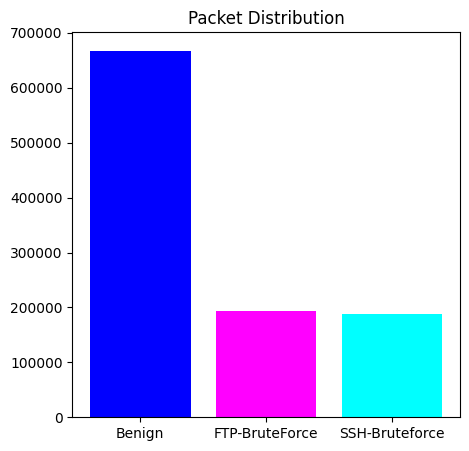

In [10]:
# bar chart of packets label
plt.figure(figsize=(5, 5))
plt.title('Packet Distribution')
plt.bar(x=['Benign', 'FTP-BruteForce', 'SSH-Bruteforce'], height=network_data_d1['Label'].value_counts(), color=['blue', 'magenta', 'cyan'])
p = plt.gcf()

### **Pie Chart**

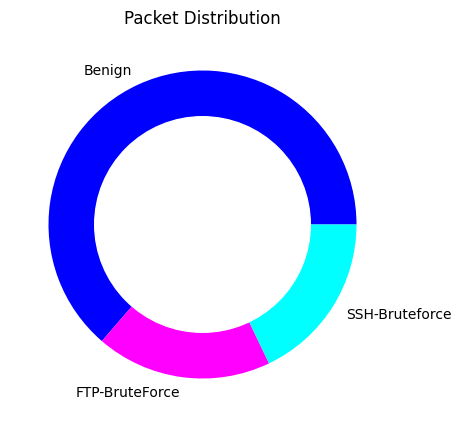

In [11]:
# pie chart of packets label
plt.figure(figsize=(5, 5))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.title('Packet Distribution')
plt.pie(network_data_d1['Label'].value_counts(), labels=['Benign', 'FTP-BruteForce', 'SSH-Bruteforce'], colors=['blue', 'magenta', 'cyan'])
p = plt.gcf()
p.gca().add_artist(circle)

## **Data Preprocessing**

### **Temporarily Hold Data**
This helps to code while manupulating the data. If something unexpected operation happend on data, strat a run from this cell is enough. Don't have to run full notebook.

In [12]:
# while working comment one line and uncomment another as needed
temp_network_data_d1 = network_data_d1
#network_data_d1 = temp_network_data_d1

### **Drop Infinate and Null**

In [13]:
print (network_data_d1.shape)

# replace infinity value as null value
network_data_d1 = network_data_d1.replace(["Infinity", "infinity"], np.inf)
network_data_d1 = network_data_d1.replace([np.inf, -np.inf], np.nan)

# drop all null values
network_data_d1.dropna(inplace=True)

print (network_data_d1.shape)

(1048575, 80)
(1044751, 80)


### **Drop Unnecessary Column**

In [14]:
network_data_d1.drop(columns="Timestamp", inplace=True)
print (network_data_d1.shape)

(1044751, 79)


### **Transform Target Label into Binary Class**

In [15]:
%%time
# encode the target feature
network_data_d1['Label'] = network_data_d1['Label'].apply(lambda x: "Benign" if x == 'Benign' else "Malicious")
print(network_data_d1['Label'].unique())

['Benign' 'Malicious']
CPU times: user 411 ms, sys: 9.78 ms, total: 421 ms
Wall time: 420 ms


In [16]:
network_data_d1['Label'].value_counts()

Benign       663808
Malicious    380943
Name: Label, dtype: int64

### **Data Balancing**

In [17]:
# split data into features and target
X=network_data_d1.drop(["Label"], axis=1)
y=network_data_d1["Label"]

#### **Oversampling**

In [18]:
%%time
# applying oversampling
ros = RandomOverSampler()
X_balanced, y_balanced = ros.fit_resample(X, y)

CPU times: user 7.91 s, sys: 987 ms, total: 8.9 s
Wall time: 8.9 s


#### **SMOTE**

In [19]:
%%time
# # applying SMOTE
# smote = SMOTE(random_state=42)
# X_balanced, y_balanced = smote.fit_resample(X, y)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs


In [20]:
network_data_d1 = pd.concat([X_balanced, y_balanced], axis=1)
print (network_data_d1.shape)
print(network_data_d1['Label'].value_counts())

(1327616, 79)
Benign       663808
Malicious    663808
Name: Label, dtype: int64


### **Data Normalization**

In [21]:
# list numeric columns
numeric_cols = network_data_d1.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_cols)

['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'B

#### **Z Score**

In [22]:
%%time
# apply z-score normalization
# std = StandardScaler()
# network_data_d1[numeric_cols] = std.fit_transform(network_data_d1[numeric_cols])

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.34 µs


#### **Min Max**

In [23]:
%%time
# apply min-max normalization
# mnmx = MinMaxScaler()
# network_data_d1[numeric_cols] = mnmx.fit_transform(network_data_d1[numeric_cols])

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.58 µs


#### **Robust**

In [24]:
%%time
# apply robust normalization
rbst = RobustScaler()
network_data_d1[numeric_cols] = rbst.fit_transform(network_data_d1[numeric_cols])

CPU times: user 7.25 s, sys: 3.44 s, total: 10.7 s
Wall time: 10.7 s


In [25]:
network_data_d1

Dst Port  Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
0       -0.372881      -6.0     298.501471      0.333333          -0.2   
1       -0.372881      -6.0     298.500800      0.333333          -0.2   
2       -0.372881      -6.0     298.493266      0.333333          -0.2   
3        0.000000       0.0      17.102068      2.333333           1.8   
4        0.000000       0.0      23.329874      2.166667           2.0   
...           ...       ...            ...           ...           ...   
1327611 -0.016949       0.0      -0.001049      0.000000           0.0   
1327612 -0.016949       0.0      -0.001049      0.000000           0.0   
1327613 -0.016949       0.0      -0.001002      0.000000           0.0   
1327614 -0.016949       0.0      -0.001052      0.000000           0.0   
1327615 -0.016949       0.0      -0.001049      0.000000           0.0   

         TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
0               0.000000         0.000000         0.000000              0.0   
1               0.000000         0.000000         0.000000              0.0   
2               0.000000         0.000000         0.000000              0.0   
3               2.723077         2.884518         3.738693              0.0   
4               2.512088         2.803299         3.738693              0.0   
...                  ...              ...              ...              ...   
1327611         0.000000         0.000000         0.000000              0.0   
1327612         0.000000         0.000000         0.000000              0.0   
1327613         0.000000         0.000000         0.000000              0.0   
1327614         0.000000         0.000000         0.000000              0.0   
1327615         0.000000         0.000000         0.000000              0.0   

         Fwd Pkt Len Mean  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0                0.000000  ...              -1.6          0.0         0.0   
1                0.000000  ...              -1.6          0.0         0.0   
2                0.000000  ...              -1.6          0.0         0.0   
3                1.485612  ...               0.0          0.0         0.0   
4                1.468397  ...               0.0          0.0         0.0   
...                   ...  ...               ...          ...         ...   
1327611          0.000000  ...               0.4          0.0         0.0   
1327612          0.000000  ...               0.4          0.0         0.0   
1327613          0.000000  ...               0.4          0.0         0.0   
1327614          0.000000  ...               0.4          0.0         0.0   
1327615          0.000000  ...               0.4          0.0         0.0   

         Active Max  Active Min   Idle Mean    Idle Std    Idle Max  \
0               0.0         0.0  56320859.5  139.300036  56320958.0   
1               0.0         0.0  56320733.0  114.551299  56320814.0   
2               0.0         0.0  56319311.5  301.934596  56319525.0   
3               0.0         0.0         0.0    0.000000         0.0   
4               0.0         0.0         0.0    0.000000         0.0   
...             ...         ...         ...         ...         ...   
1327611         0.0         0.0         0.0    0.000000         0.0   
1327612         0.0         0.0         0.0    0.000000         0.0   
1327613         0.0         0.0         0.0    0.000000         0.0   
1327614         0.0         0.0         0.0    0.000000         0.0   
1327615         0.0         0.0         0.0    0.000000         0.0   

           Idle Min      Label  
0        56320761.0     Benign  
1        56320652.0     Benign  
2        56319098.0     Benign  
3               0.0     Benign  
4               0.0     Benign  
...             ...        ...  
1327611         0.0  Malicious  
1327612         0.0  Malicious  
1327613         0.0  Malicious  
1327614         0.0  Malicious  
1327615         0.0  Malicious

## **Feature Selection**

### **Drop Constant Column**

In [26]:
# drop the constant columns (which varience is 0)
variances = network_data_d1.var(numeric_only=True)
constant_columns = variances[variances == 0].index
network_data_d1 = network_data_d1.drop(constant_columns, axis=1)

print (network_data_d1.shape)

(1327616, 69)


### **Check and Drop Duplicate Column**

In [27]:
duplicates = set()
for i in range(0, len(network_data_d1.columns)):
    col1 = network_data_d1.columns[i]
    for j in range(i+1, len(network_data_d1.columns)):
        col2 = network_data_d1.columns[j]
        if(network_data_d1[col1].equals(network_data_d1[col2])):
            duplicates.add(col2)

print (duplicates)
network_data_d1.drop(duplicates, axis=1, inplace=True)
print (network_data_d1.shape)

{'Subflow Bwd Pkts', 'Fwd Seg Size Avg', 'Subflow Fwd Byts', 'Subflow Fwd Pkts', 'SYN Flag Cnt', 'Subflow Bwd Byts'}
(1327616, 63)


### **Encode Target Label**

In [28]:
# encode the target feature
network_data_d1['Label'] = network_data_d1['Label'].apply(lambda x: 0 if x == 'Benign' else 1)
print(network_data_d1['Label'].unique())

[0 1]


### **Drop Column Based on Correlations**

#### **Correlations of Data**

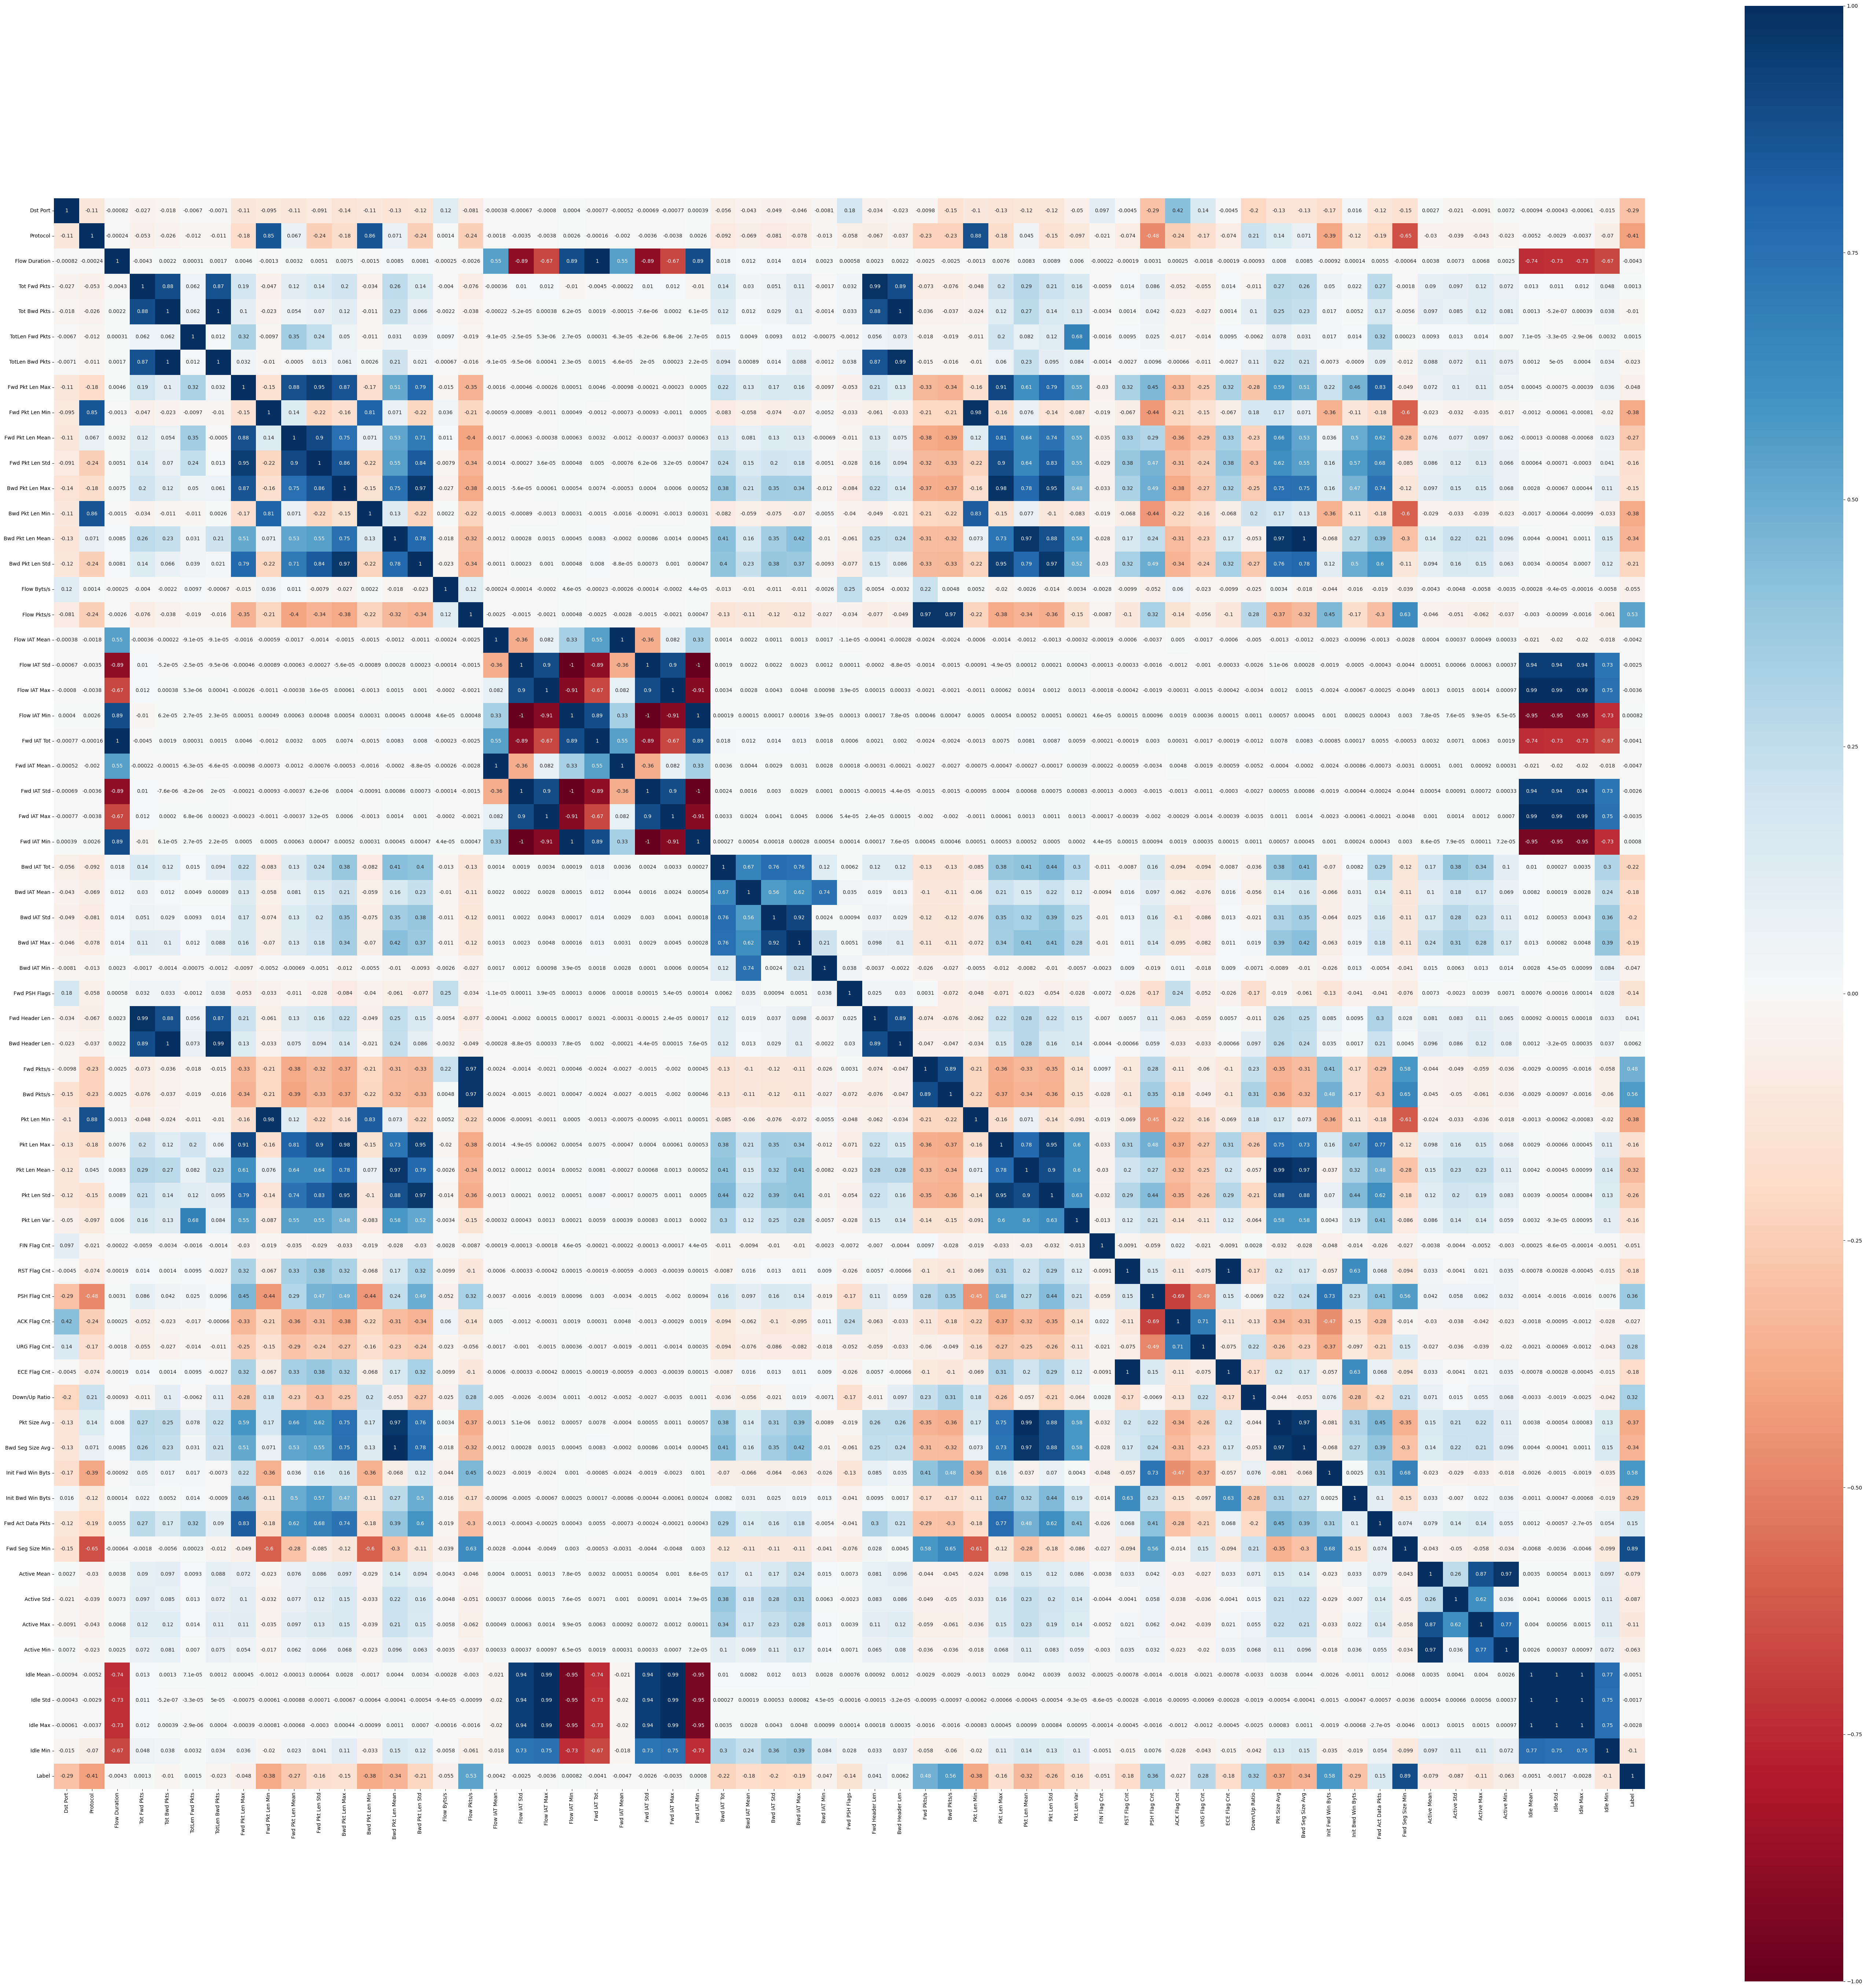

In [29]:
# pearson correlation heatmap
plt.figure(figsize=(70, 70))
corr = network_data_d1.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, square=True) # annot=True
plt.show()

#### **Drop Columns**

In [30]:
correlated_col = set()
is_correlated = [True] * len(corr.columns)
threshold = 0.85
for i in range (len(corr.columns)):
    if(is_correlated[i]):
        for j in range(i):
          if (corr.iloc[i, j] >= threshold) and (is_correlated[j]):
            colname = corr.columns[j]
            is_correlated[j]=False
            correlated_col.add(colname)

print(correlated_col)
print(len(correlated_col))

{'Tot Bwd Pkts', 'Fwd Pkt Len Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Pkt Len Max', 'Bwd IAT Std', 'Flow IAT Std', 'Flow Pkts/s', 'Flow IAT Min', 'Protocol', 'Bwd Pkt Len Mean', 'Active Mean', 'Idle Mean', 'Fwd IAT Tot', 'Fwd Pkts/s', 'Fwd Pkt Len Max', 'Fwd Header Len', 'Fwd Pkt Len Min', 'Pkt Len Std', 'Flow IAT Max', 'Tot Fwd Pkts', 'Pkt Size Avg', 'TotLen Bwd Pkts', 'Fwd Pkt Len Std', 'Flow IAT Mean', 'Bwd Pkt Len Std', 'Idle Std', 'Fwd Seg Size Min', 'Pkt Len Mean', 'RST Flag Cnt', 'Flow Duration', 'Bwd Pkt Len Max'}
32


In [31]:
network_data_d1.drop(correlated_col, axis=1, inplace=True)
print (network_data_d1.shape)

(1327616, 31)


#### **Correlations of Data**

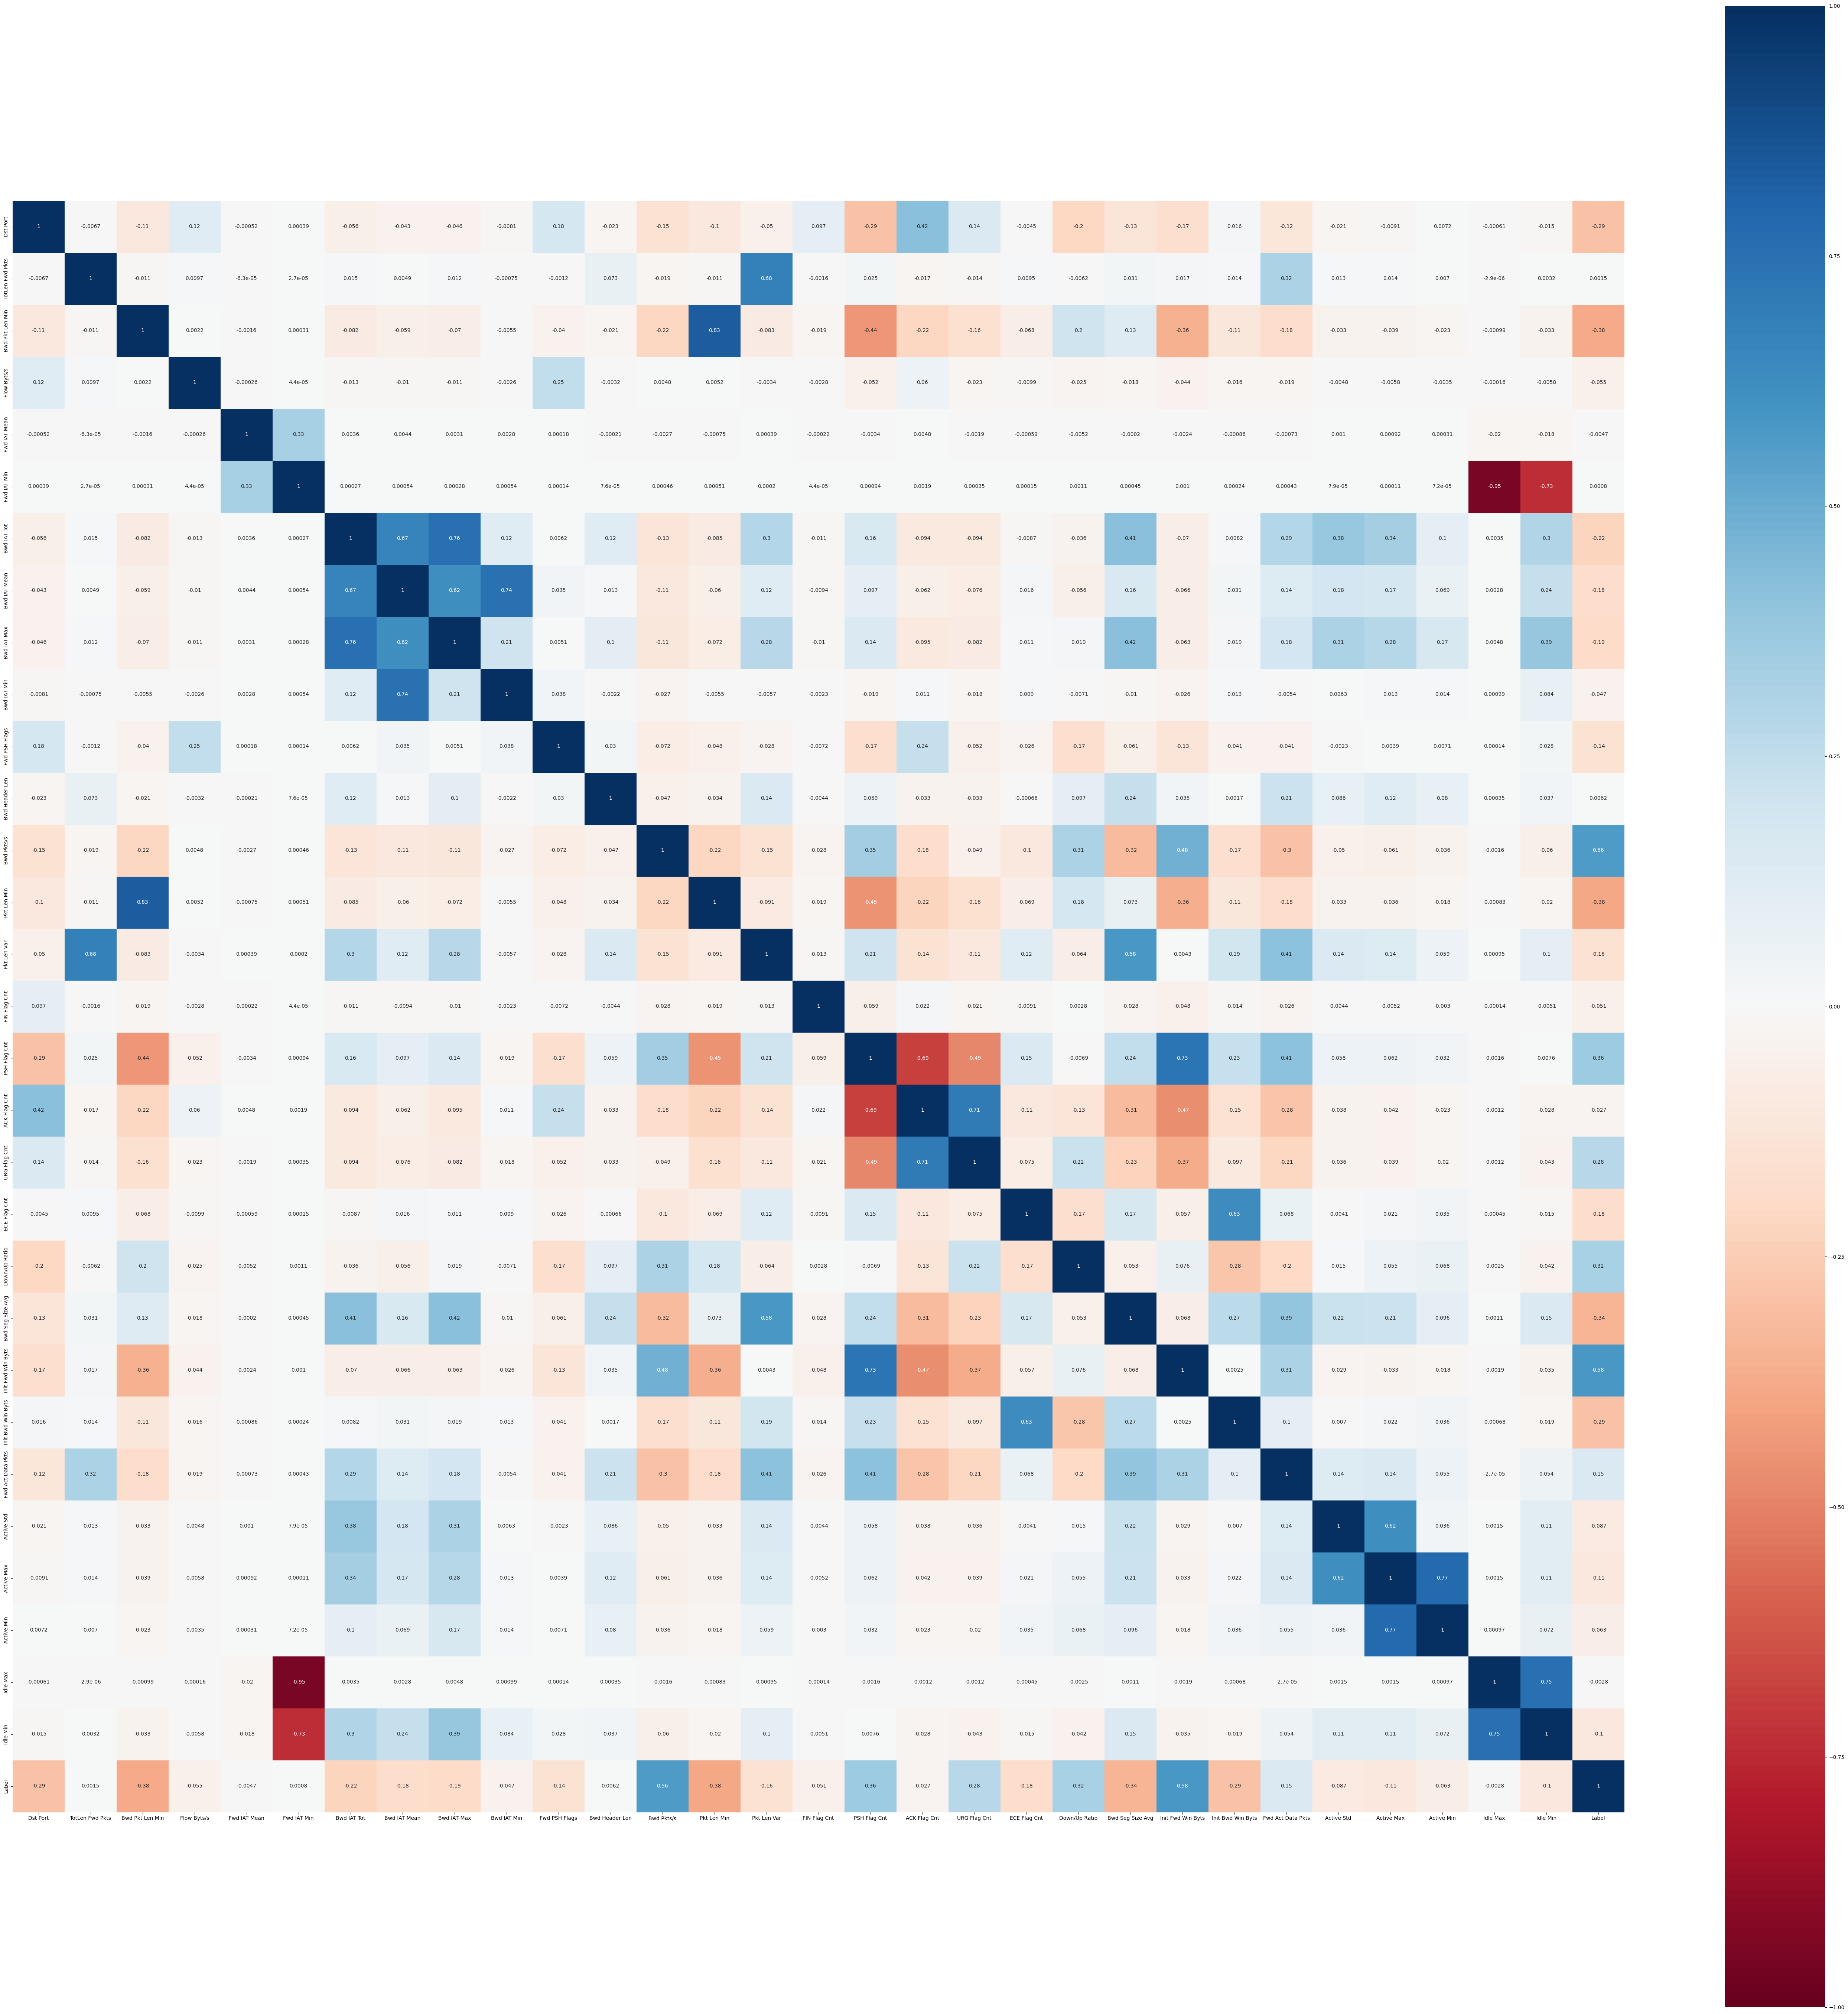

In [32]:
# pearson correlation heatmap
plt.figure(figsize=(70, 70))
corr = network_data_d1.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, square=True) # annot=True
plt.show()

### **Recursive Feature Elimination (RFE) with Cross-Vlidation**

In [33]:
# # split data into features and target
# X=network_data_d1.drop(["Label"], axis=1)
# y=network_data_d1["Label"]

In [34]:
# %%time
# # applying RFE with CV
# dt = DecisionTreeClassifier()
# cv = StratifiedKFold(5)
# min_features = 1

# rfecv = RFECV(estimator=dt, step=1, cv=cv, scoring="accuracy", min_features_to_select=min_features, n_jobs=2)
# rfecv.fit(X, y)

In [35]:
# num_selected_features = rfecv.n_features_
# selected_features = X.columns[rfecv.support_]
# print(num_selected_features)
# print(selected_features)

In [36]:
# network_data_d1 = network_data_d1.loc[:, selected_features]
# network_data_d1

In [37]:
# # presenting number of feature vs accuracy
# num_scores = len(rfecv.cv_results_["mean_test_score"])
# plt.figure()
# plt.xlabel("Number of Selected Features")
# plt.ylabel("Mean Test Accuracy")
# plt.errorbar(
#     range(min_features, num_scores + min_features),
#     rfecv.cv_results_["mean_test_score"],
#     yerr=rfecv.cv_results_["std_test_score"],
# )
# plt.title("Recursive Feature Elimination")
# plt.show()

### **Sequential Feature Selection**

In [38]:
# # split data into features and target
# X=network_data_d1.drop(["Label"], axis=1)
# y=network_data_d1["Label"]

#### **Forward Feature Selection**

In [39]:
# %%time
# # applying forward feature selection
# dt = DecisionTreeClassifier()
# sfs_forward = SequentialFeatureSelector(
#     dt, n_features_to_select=35, direction="forward"
# ).fit(X, y)

In [40]:
# selected_features = X.columns[sfs_forward.get_support()]
# print(selected_features)

#### **Backward Feature Selection**

In [41]:
# %%time
# # applying backward feature selection
# dt = DecisionTreeClassifier()
# sfs_backward = SequentialFeatureSelector(
#     dt, n_features_to_select=35, direction="backward"
# ).fit(X, y)

In [42]:
# selected_features = X.columns[sfs_backward.get_support()]
# print(selected_features)

In [43]:
# network_data_d1 = network_data_d1.loc[:, selected_features] # add target lebel
# network_data_d1

# **Classification**
Here many algoritms will be used to classify the data.

### **Split Data**

In [44]:
X=network_data_d1.drop(["Label"], axis=1)
y=network_data_d1["Label"]

# split the data for evaluation
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state =42, shuffle=True)

# K-fold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

### **Confusion Metrix HeatMap**

In [45]:
def confusionMatrixHeatMap(cm, title):
    # box lebels
    group_counts = ["{0:0.0f}\n".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    box_labels = [f"{v1}{v2}".strip() for v1, v2 in zip(group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cm.shape[0],cm.shape[1])

    # categories
    categories = ['Benign', 'Malicious']

    # create a heatmap of the confusion matrix
    sns.heatmap(cm, annot=box_labels, fmt='', cmap='Blues', cbar=False, xticklabels=categories, yticklabels=categories)

    # create and add rectangle patch
    ax = plt.gca()
    rect = patches.Rectangle((0, 0), len(cm[0]), len(cm), linewidth=2, edgecolor='black', facecolor='none')
    ax.add_patch(rect)

    # set labels, title, and axis ticks
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    title_font = { 'fontsize': 16, 'fontname': 'Times New Roman' }
#     plt.title('Decision Tree\n', **title_font)
    plt.title(title + '\n', **title_font)

    # calculate accuracy and misclassification rate
    total_samples = len(y)
    correct_predictions = sum(y == y_pred)
    incorrect_predictions = total_samples - correct_predictions
    accuracy = correct_predictions / total_samples
    misclassification_rate = incorrect_predictions / total_samples

    # add accuracy and misclassification rate to the heatmap
    plt.text(0.5, -0.1, f'\n\n\nAccuracy: {accuracy:.2f}', ha='center', va='center', transform=plt.gca().transAxes)
    plt.text(0.5, -0.2, f'\nMisclassification Rate: {misclassification_rate:.4f}', ha='center', va='center', transform=plt.gca().transAxes)

    # Show the plot
    plt.show()

## **LazyClassifier**

In [46]:
# LazyClassifier
# clf = LazyClassifier(verbose = 0,
#                      ignore_warnings = True,
#                      custom_metric = None,
#                      predictions = False,
#                      random_state = 12,
#                      classifiers = 'all')

# models, predictions = clf.fit(X_train, X_test, y_train, y_test)
# models

## **Decision Tree**

Dicision Tree
Confusion Matrix:
[[663804      4]
 [     0 663808]]
Performance Matrix:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    663808
           1       1.00      1.00      1.00    663808

    accuracy                           1.00   1327616
   macro avg       1.00      1.00      1.00   1327616
weighted avg       1.00      1.00      1.00   1327616

AUC: 0.9999969870806017


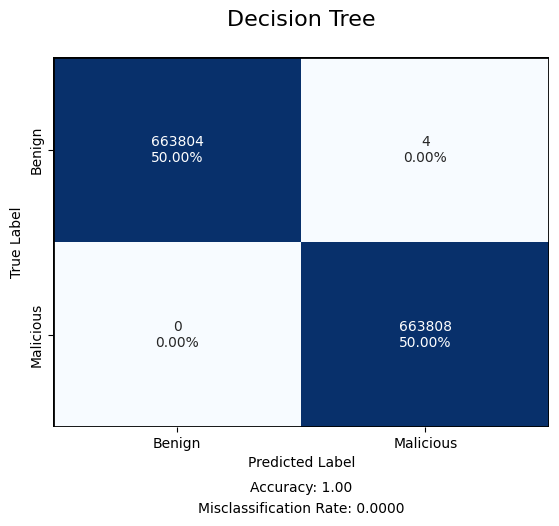

CPU times: user 53.2 s, sys: 1.52 s, total: 54.7 s
Wall time: 54.5 s


In [73]:
%%time
# create a Decision Tree model
dt = DecisionTreeClassifier()

# predict
y_pred = cross_val_predict(dt, X, y, cv=kf)


print ("Dicision Tree")
# generate report
cm=confusion_matrix(y, y_pred)
cr=classification_report(y, y_pred)
auc = roc_auc_score(y, y_pred)

print("Confusion Matrix:")
print(cm)

print("Performance Matrix:")
print(cr)

print("AUC:", auc)

confusionMatrixHeatMap(cm, title="Decision Tree")

## **Extra Tree**

In [48]:
# %%time
# # create a Extra Trees model
# et = ExtraTreeClassifier()

# # predict
# y_pred = cross_val_predict(et, X, y, cv=kf)

# print ("Extra Tree")
# # generate report
# cm=confusion_matrix(y, y_pred)
# cr=classification_report(y, y_pred)

# print("Confusion Matrix:")
# print(cm)

# print("Performance Matrix:")
# print(cr)

## **Random Forest**

In [49]:
# %%time
# # create a Random Forest model
# rf = RandomForestClassifier()

# # predict
# y_pred = cross_val_predict(rf, X, y, cv=kf)

# print ("Random Forest")
# # generate report
# cm=confusion_matrix(y, y_pred)
# cr=classification_report(y, y_pred)

# print("Confusion Matrix:")
# print(cm)

# print("Performance Matrix:")
# print(cr)

## **Extra Trees**

In [50]:
# %%time
# # create a Extra Trees model
# ett = ExtraTreesClassifier()

# # predict
# y_pred = cross_val_predict(ett, X, y, cv=kf)

# print ("Extra Trees")
# # generate report
# print("Confusion Matrix:")
# print(confusion_matrix(y, y_pred))

# print("Performance Matrix:")
# print(classification_report(y, y_pred))

## **Light Gradient Boosting Machine (LightGBM)**

In [51]:
# %%time
# # create a LightGBM model
# lgb = LGBMClassifier()

# # predict
# y_pred = cross_val_predict(lgb, X, y, cv=kf)

# print ("LightGBM")
# # generate report
# print("Confusion Matrix:")
# print(confusion_matrix(y, y_pred))

# print("Performance Matrix:")
# print(classification_report(y, y_pred))

## **eXtreme Gradient Boosting (XGBoost)**

In [52]:
# %%time
# # create a XGBoost model
# xgb = XGBClassifier()

# # predict
# y_pred = cross_val_predict(xgb, X, y, cv=kf)

# print ("XGBoost")
# # generate report
# print("Confusion Matrix:")
# print(confusion_matrix(y, y_pred))

# print("Performance Matrix:")
# print(classification_report(y, y_pred))

## **Cat Boost**

In [53]:
# %%time
# # create a Cat Boost model
# cb = CatBoostClassifier()

# # predict
# y_pred = cross_val_predict(cb, X, y, cv=kf)

# print ("Cat Boost")
# # generate report
# print("Confusion Matrix:")
# print(confusion_matrix(y, y_pred))

# print("Performance Matrix:")
# print(classification_report(y, y_pred))

## **Ada Boost**

In [54]:
# %%time
# # create a Ada Boost model
# ada = AdaBoostClassifier()

# # predict
# y_pred = cross_val_predict(ada, X, y, cv=kf)

# print ("Ada Boost")
# # generate report
# print("Confusion Matrix:")
# print(confusion_matrix(y, y_pred))

# print("Performance Matrix:")
# print(classification_report(y, y_pred))

## **K-Nearest Neighbors (KNN)**

In [55]:
# %%time
# # create a KNN model
# knn = KNeighborsClassifier()

# # predict
# y_pred = cross_val_predict(knn, X, y, cv=kf)

# print ("KNN")
# # generate report
# print("Confusion Matrix:")
# print(confusion_matrix(y, y_pred))

# print("Performance Matrix:")
# print(classification_report(y, y_pred))

## **Gaussian Naive Bayes**

In [56]:
# %%time
# # create a Gaussian Naive Bayes model
# gnb = GaussianNB()

# # predict
# y_pred = cross_val_predict(gnb, X, y, cv=kf)

# print ("Gaussian Naive Bayes")
# # generate report
# print("Confusion Matrix:")
# print(confusion_matrix(y, y_pred))

# print("Performance Matrix:")
# print(classification_report(y, y_pred))

## **Support Vector Classifier (SVC)**

In [57]:
# %%time
# # create a SVC model
# svc = SVC()

# # predict
# y_pred = cross_val_predict(svc, X, y, cv=kf)

# print ("Support Vector Classifier")
# # generate report
# print("Confusion Matrix:")
# print(confusion_matrix(y, y_pred))

# print("Performance Matrix:")
# print(classification_report(y, y_pred))

# **Explainable Artificial Intelligence (XAI)**

### **Split Data**

In [58]:
X=network_data_d1.drop(["Label"], axis=1)
y=network_data_d1["Label"]

# split the data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state =42, shuffle=True)

# K-fold
# kf = KFold(n_splits=10, shuffle=True, random_state=42)

## **Classifier Model**

### **Decision Tree**

In [59]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66418
           1       1.00      1.00      1.00     66344

    accuracy                           1.00    132762
   macro avg       1.00      1.00      1.00    132762
weighted avg       1.00      1.00      1.00    132762



In [76]:
# Save the model
with open('model.pkl', 'wb') as file:
    pickle.dump(dtc, file)

# # Load the model
# with open('model.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)

## **LIME**

In [63]:
test_sample = X_test.iloc[0, :]
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X.columns.tolist(), verbose=True, mode='classification')
exp = explainer.explain_instance(test_sample.values, dtc.predict_proba)
exp.show_in_notebook()

Intercept 0.26697349784586316
Prediction_local [0.15906793]
Right: 0.0


X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


In [61]:
# lime = LimeTabular(data=X_train, random_state=1, model = dtc)
# lime_local = lime.explain_local(X_test[-5:], y_test[-5:], name='LIME')

# show(lime_local)

## **GSM (IDT)**

In [64]:
dt = DecisionTreeClassifier()
dt.fit(X_test, y_pred)

DecisionTreeClassifier()

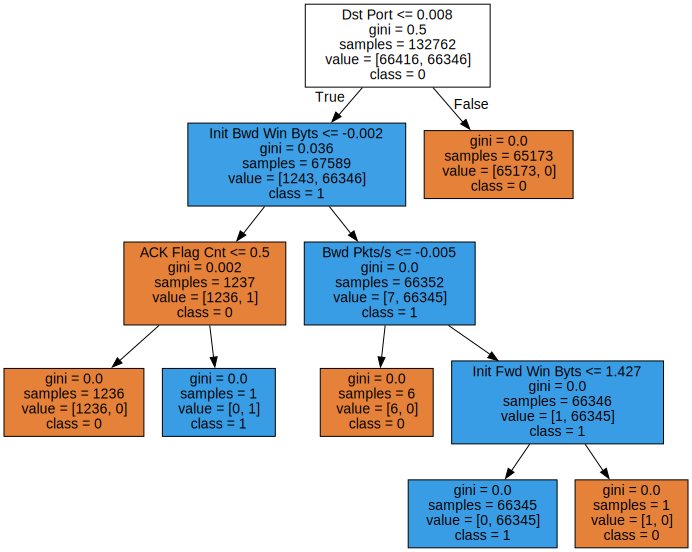

In [70]:
dot_data = tree.export_graphviz(dt, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True)
graph = graphviz.Source(dot_data)
graph.render("induced_dt_tree_view")
graph

## **SHAP**

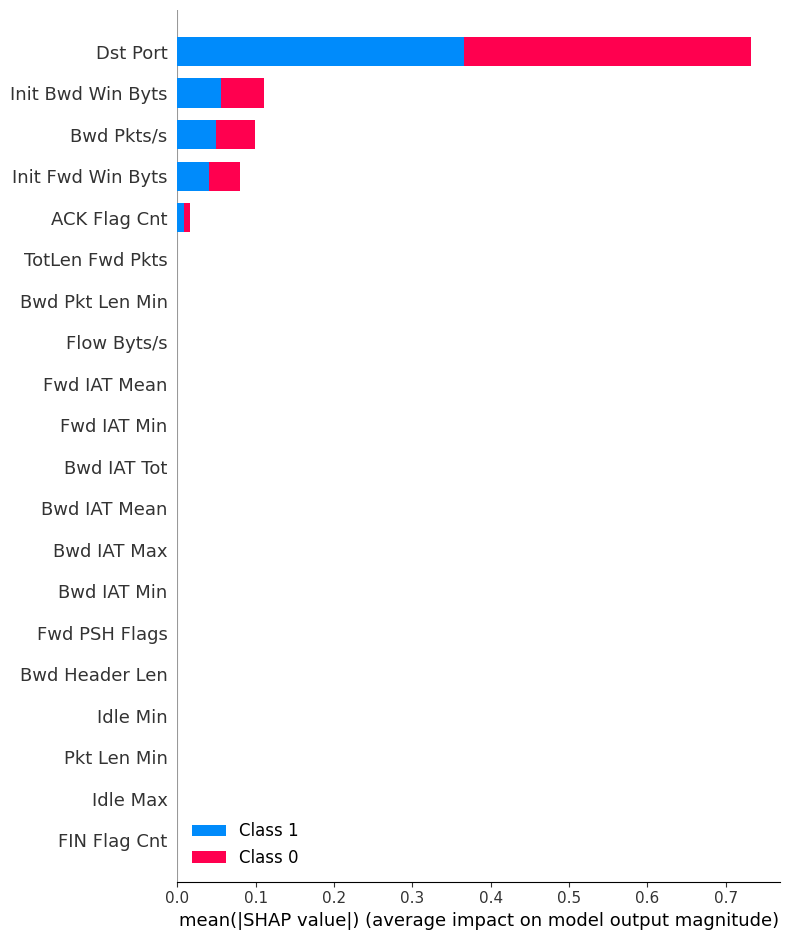

In [62]:
explainer = shap.Explainer(dtc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type='bar')
plt.show()
